In [1]:
import pandas as pd
import numpy as np
import os
from numpy import random
import scipy 
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm ,t
import seaborn as sns
import pylab
from pylab import legend,plot,show,title,xlabel,ylabel
from random import choice
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import proportion  as ssp
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels import discrete
from statsmodels.discrete import discrete_model
from statsmodels.discrete.discrete_model import MNLogit
from statsmodels.miscmodels.ordinal_model import OrderedModel
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson as psn
from statsmodels.discrete.discrete_model import NegativeBinomial as ngb
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso

## Decision Tree
- The factor which have less gini impurity then we can take the split on the basis.
  
1. We are going to select factor so that Gini Impurity is less.
2. We will go for the split where Information gain in more.
3. We will go for the split where Entropy is less.

<img>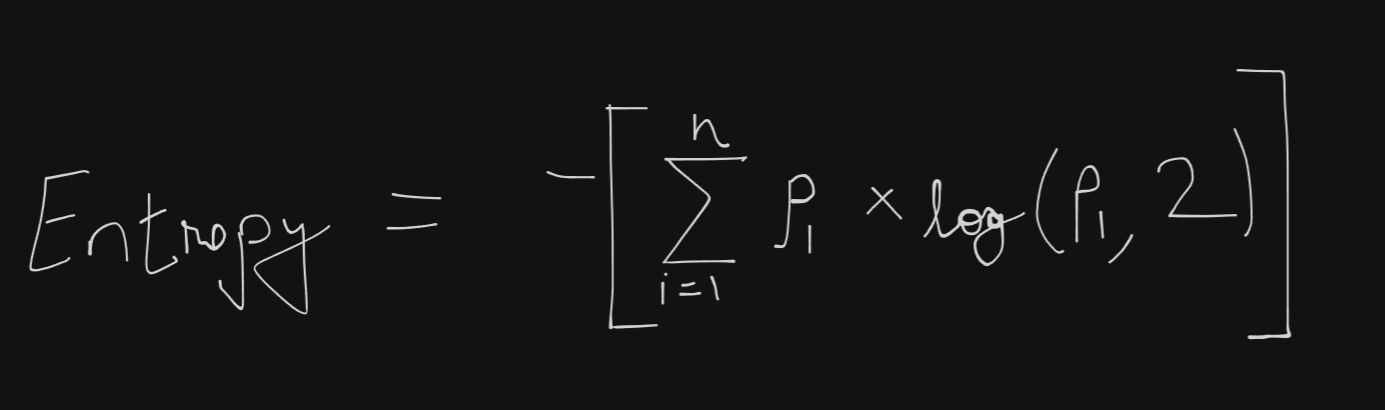</img>

In [4]:
df = pd.read_excel('Titanic.xlsx', sheet_name='Titanic')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [12]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
df['Embarked'] = df['Embarked'].fillna('S')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [15]:
pclass_dum = pd.get_dummies(df['Pclass'], prefix = 'Pclass', drop_first=True).astype(int)
sex_dum = pd.get_dummies(df['Sex'], prefix = 'Sex', drop_first = True).astype(int)
sibs_dum = pd.get_dummies(df['SibSp'], prefix = 'SibSp', drop_first = True).astype(int)
parch_dum = pd.get_dummies(df['Parch'], prefix = 'Parch', drop_first = True).astype(int)
embark_dum = pd.get_dummies(df['Embarked'], prefix = 'Embarked', drop_first = True).astype(int)

In [16]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [17]:
df = df.drop(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], axis = 1)

In [18]:
df = pd.concat([df, pclass_dum, sex_dum, sibs_dum, parch_dum, embark_dum], axis = 1)

In [19]:
df.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26.0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
x = df.drop('Survived', axis = 1)
y = df['Survived'] ## Respose

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
mod1 = DecisionTreeClassifier()
mod1.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
y_pred = mod1.predict(x_test)

In [25]:
print(confusion_matrix(y_test, y_pred))

[[93 19]
 [21 46]]


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       112
           1       0.71      0.69      0.70        67

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



In [27]:
mod1.score(x_train, y_train)

0.9845505617977528

In [28]:
mod1.score(x_test, y_test)

0.776536312849162

In [29]:
mod2 = DecisionTreeClassifier()

In [30]:
parameters = {'max_depth' : [2,3,4,5,6]} # most important Hyperparameter, maximum number of splits to allow in your decision tree
# np.arange(2, 200)

In [31]:
dec_treecv = GridSearchCV(mod2, parameters)

In [32]:
dec_treecv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6]})

In [33]:
print(dec_treecv.best_params_)

{'max_depth': 4}


In [34]:
y_pred = dec_treecv.predict(x_test)

In [35]:
mod1.score(x_train, y_train)

0.9845505617977528

In [36]:
mod1.score(x_test, y_test)

0.776536312849162

In [37]:
dec_treecv.score(x_train, y_train)

0.848314606741573

In [38]:
dec_treecv.score(x_test, y_test)

0.8100558659217877

In [39]:
# mod1 = DecisionTreeClassifier(max_depth=3) # forcing to use number of splits

**DecisionTreeClassifier (Hyperparameters):**
- max_depth
- criterion = gini or entropy
- min_samples_split --> (2)
- min_samples_leaf --->
- max_features = sqrt(n_features) ---> this will define how many features should we take

## Bagging 


## Boosting
- each model learns form the errors made from the previous model
- each subsequent model would be an imporved version of previous model
- There are certain hyperparameters that are predefined so that it doesn't lead to overfitting

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
mod2 = RandomForestClassifier(n_estimators=10)
mod2.fit(x_train, y_train)
y_pred = mod2.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[99 13]
 [23 44]]


In [44]:
mod2.score(x_train, y_train)

0.9662921348314607

In [45]:
mod2.score(x_test, y_test)

0.7988826815642458